In [1]:
import numpy as np
import dask.array as da

### Dask Arrays interface is similar to Numpy API

In [2]:
np_arr = np.random.randint(20, size=20)
np_arr

array([19, 15,  3,  2,  6,  3,  4, 18, 16,  5, 14,  6, 11, 10, 19, 14, 14,
       17, 16, 11])

### In this case, we just need to add an additional attribute `chunks`

In [3]:
dask_arr = da.random.randint(20, size=20, chunks=4)

### You will see that the array has not been computed till now.

In [4]:
dask_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(4,), chunktype=numpy.ndarray>

### This is simply because Dask does lazy evaluaion.   
### You need to call `compute()` to start the execution

In [5]:
dask_arr.compute()

array([ 9,  0,  6,  4, 17,  4,  9, 13, 16, 13,  0, 16,  2,  8,  0,  7, 19,
       19,  0,  8])

### Chunks size 

In [6]:
dask_arr.chunks

((4, 4, 4, 4, 4),)

### Creating arrays from existing data

In [7]:
dask_arr_from_np = da.from_array(np_arr, chunks=5)

In [8]:
dask_arr_from_np

dask.array<array, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [9]:
dask_arr_from_np.compute()

array([19, 15,  3,  2,  6,  3,  4, 18, 16,  5, 14,  6, 11, 10, 19, 14, 14,
       17, 16, 11])

## Dask translates your array operations into a graph to tasks

#### See : http://docs.dask.org/en/latest/graphviz.html

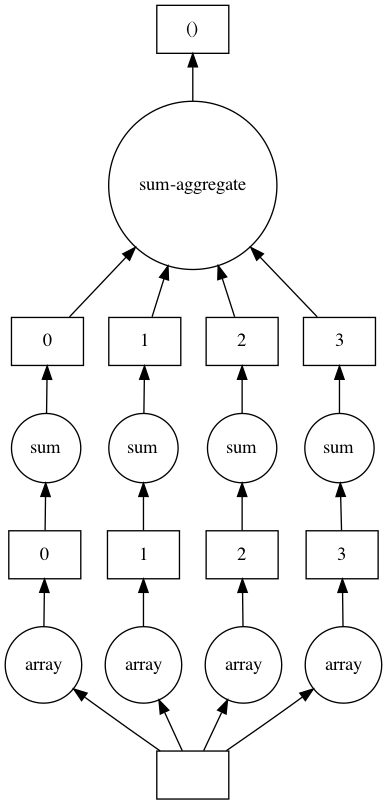

In [10]:
dask_arr_from_np.sum().visualize()

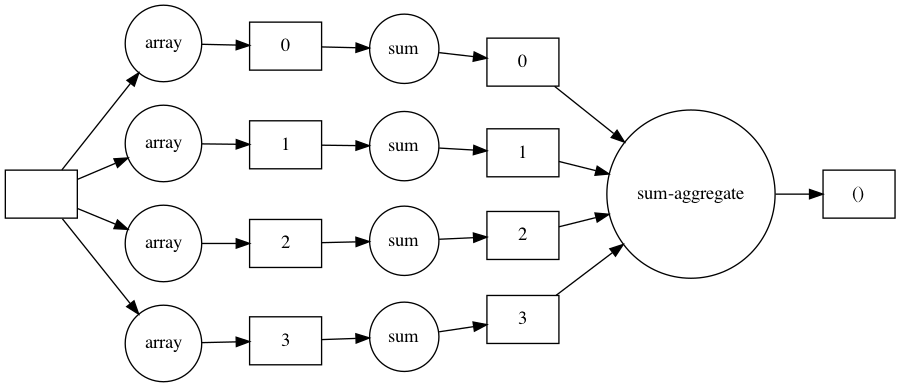

In [11]:
dask_arr_from_np.sum().visualize(rankdir="LR")

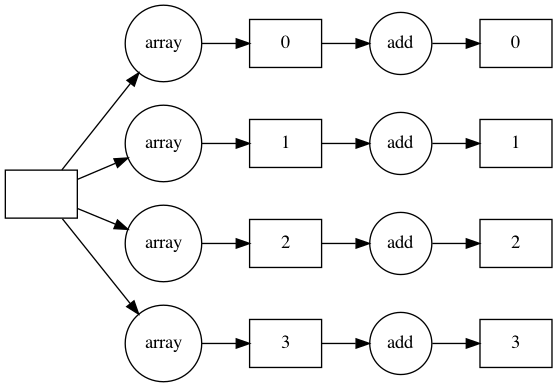

In [12]:
(dask_arr_from_np+1).visualize(rankdir="LR")

In [13]:
dask_arr_mean = da.mean(dask_arr_from_np)
dask_arr_mean.compute()

11.15

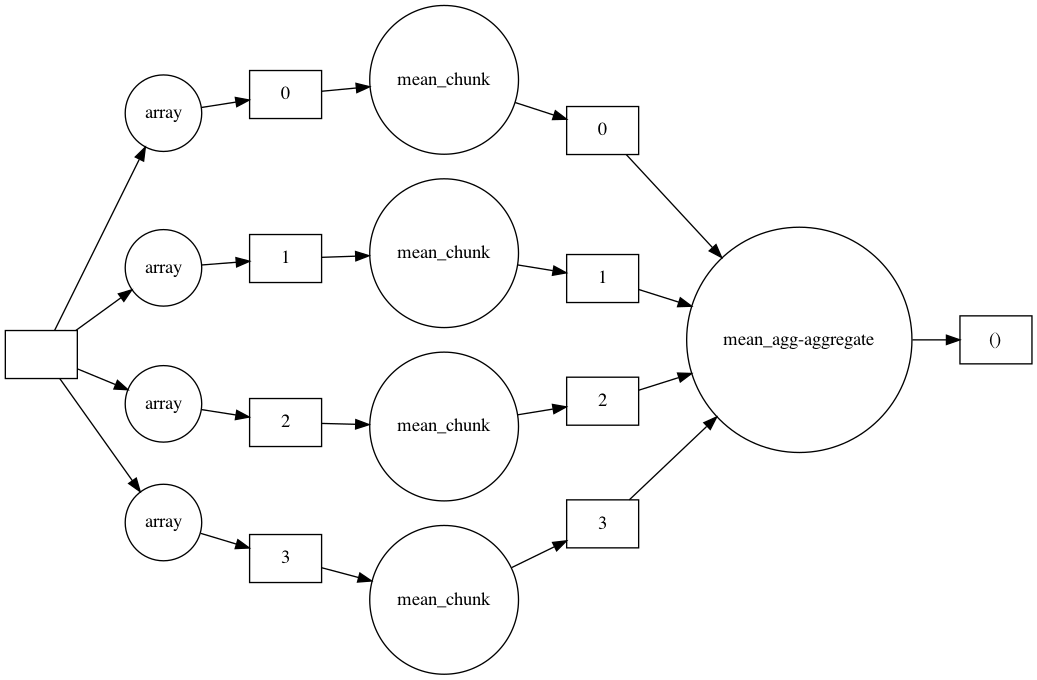

In [14]:
dask_arr_mean.visualize(rankdir="LR")

## Another Example

In [15]:
x = da.random.random(10, chunks=2)
y = da.random.random(10, chunks=2)

sum_x_y = da.add(x, y) #similar to numpy.add
mean_x_y = da.mean(sum_x_y)

In [16]:
sum_x_y.compute()

array([0.88574955, 1.44934649, 1.77494272, 1.55051211, 0.51468063,
       1.41397975, 1.05773432, 1.88946093, 1.16580074, 0.46665592])

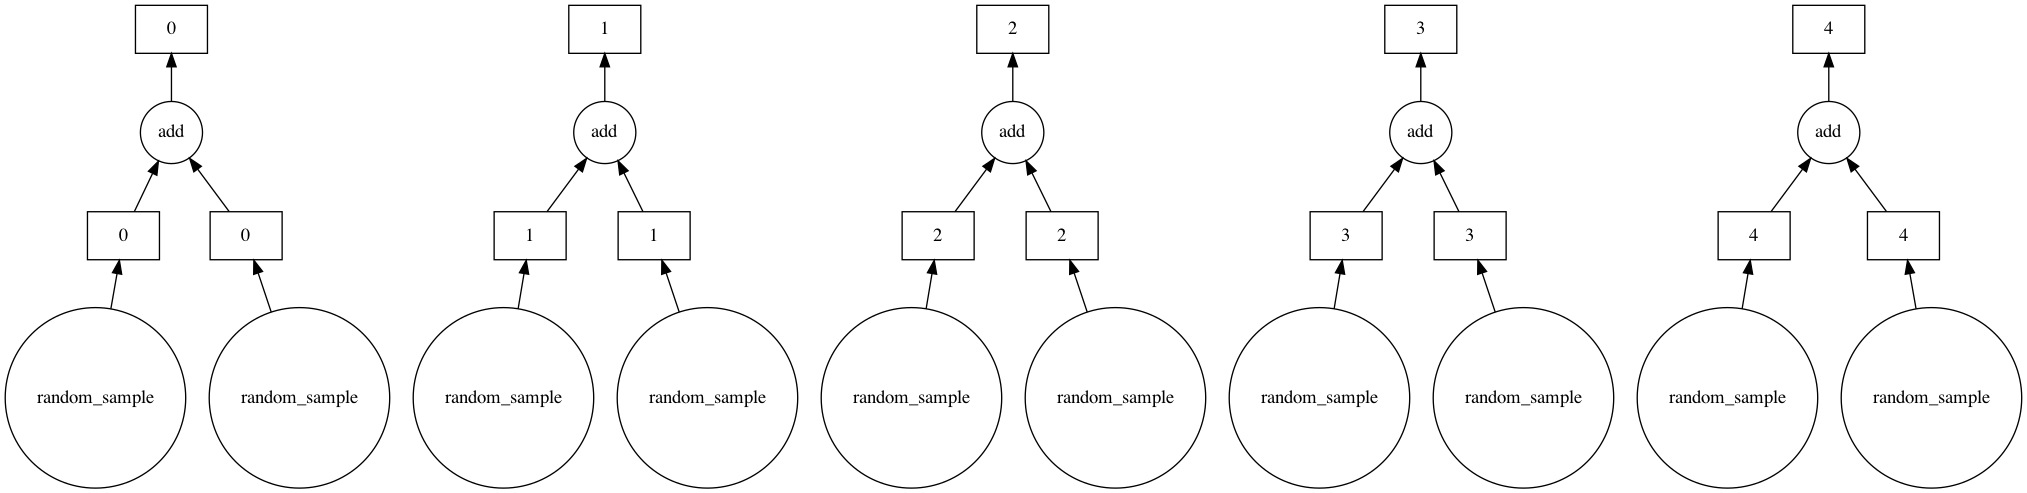

In [17]:
sum_x_y.visualize()

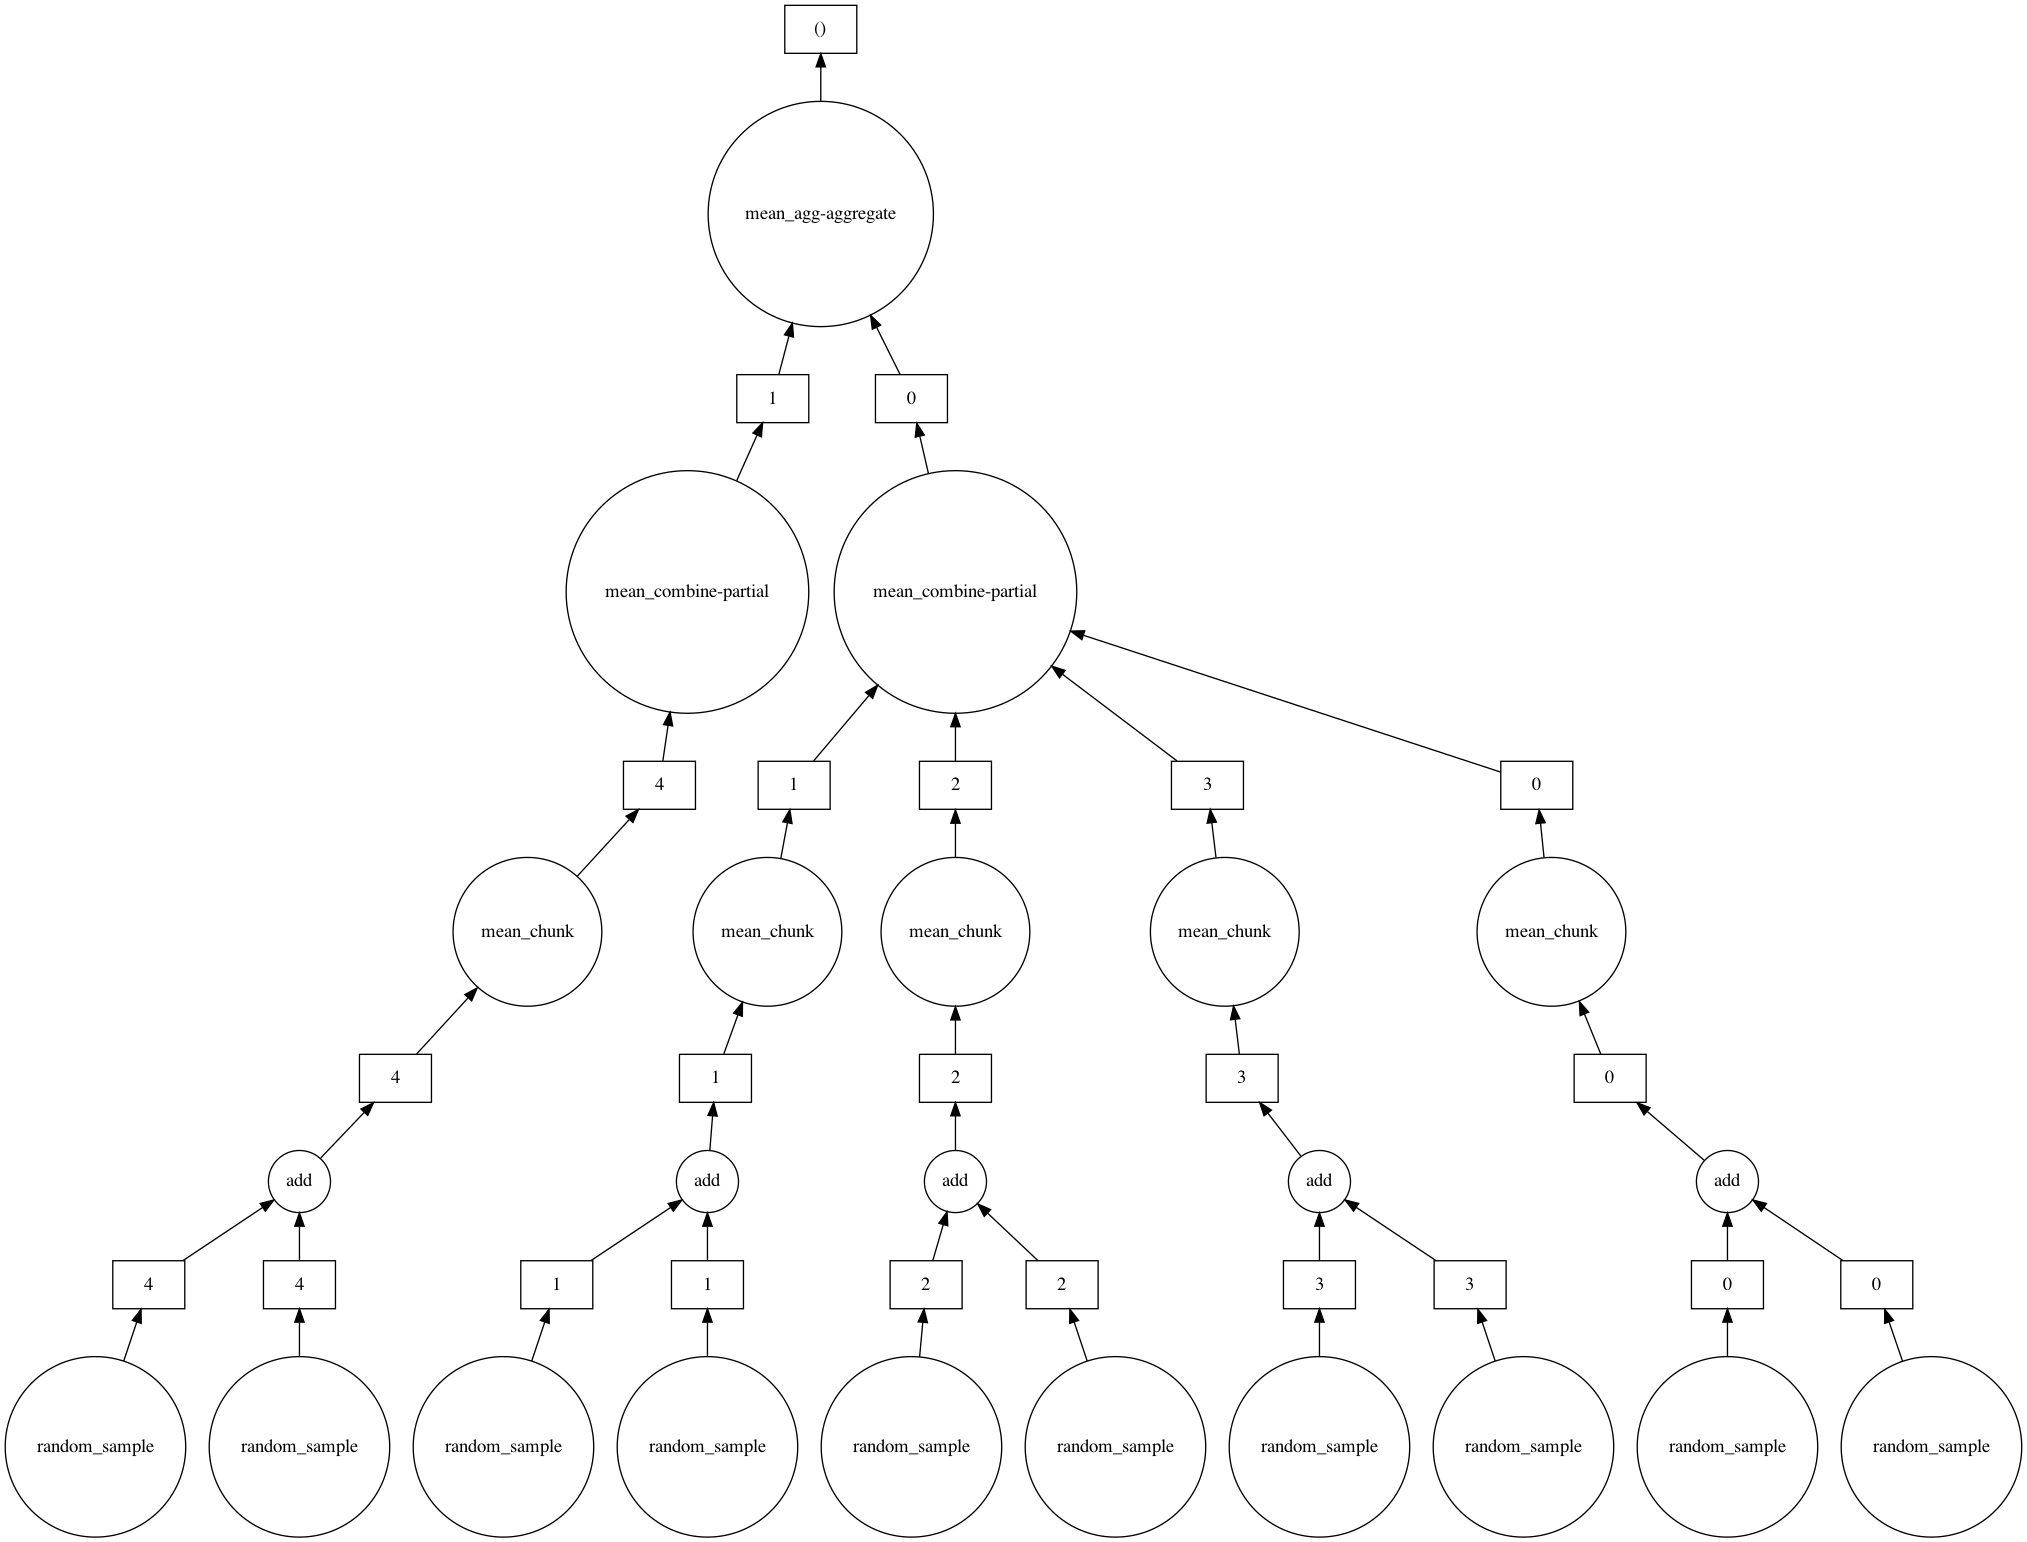

In [18]:
mean_x_y.visualize()

## An example of out-of-memory computation

In [19]:
da_arr_large = da.random.randint(10000, size=(50000, 50000),
                                 chunks=(5000, 1000))   
da_sum_large = da_arr_large.sum()   

### Get no. bytes using `nbytes` : http://docs.dask.org/en/latest/array-api.html#dask.array.Array.nbytes

In [20]:
da_arr_large.nbytes  

20000000000

### Convert bytes to GB, 1Gb = 1e+9 bytes

In [21]:
da_arr_large.nbytes/1e+9

20.0

20Gb is more than what I have on my local mac (16Gb). Yet I am able to compute this

In [22]:
da_sum_large.compute()

12498622100334